In [1]:
%cd ../../
%pwd

D:\animlib


'D:\\animlib'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.dataprep.WriteDfToJsonVar import WriteDfToJsonVar
from src.dataprep.WriteDfToJsonVar import WriteScatter
target_total = 13

D:\condaenvs\dev\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const             11.745040
attractiveness    -0.527986
dtype: float64
const             5.909541
attractiveness   -0.035543
dtype: float64


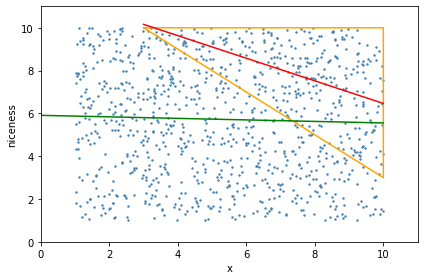

In [3]:
###########################
# berkson1
###########################

# Full scatter data
np.random.seed(1337)
data = pd.DataFrame(np.random.uniform(low=1, high=10, size=(1000,2)),columns=['attractiveness','niceness'])
data['total_score'] = data['attractiveness'] + data['niceness']

# Triangle area with y => -x + target_total
ys = []
xs = []
for x  in range(1,11):
    y = -x + target_total
    if y <= 10:
        ys.append(y)
        xs.append(x)        
df = pd.DataFrame({'x':xs, 'y':ys})
df = df.append(pd.DataFrame({'x':[10], 'y':[10]}), ignore_index=True)
df = df.append(pd.DataFrame({'x':[xs[0]], 'y':[10]}), ignore_index=True)
df  = df.iloc[::-1]
df.index = df['x']; del df['x']

# Fit regression lines for sub-population inside the triangle
import statsmodels.api as sm
Y = data.loc[ data['total_score']>=target_total, 'niceness']
X = data.loc[ data['total_score']>=target_total, 'attractiveness']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results_sub = model.fit()
print(results_sub.params)

# Regression line for sub-population
regline_sub = pd.DataFrame({'y':list(results_sub.params[0] + range(df.index[0],11) * results_sub.params[1])}, index=range(df.index[0],11))

# Fit regression lines for full population
import statsmodels.api as sm
Y = data['niceness']
X = data['attractiveness']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results_full = model.fit()
print(results_full.params)

# Regression line for full population
regline_full = pd.DataFrame({'y':list(results_full.params[0] + range(0,11) * results_full.params[1])}, index=range(0,11))

# Plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
_ = data.plot.scatter(ax=ax, x='attractiveness', y='niceness', s=2, color='steelblue')
_ = df.plot(ax=ax, c="orange", legend=False)
_ = regline_sub.plot(ax=ax, c="red", legend=False)
_ = regline_full.plot(ax=ax, c="green", legend=False)
ax.set_xlim(0,11)
ax.set_ylim(0,11)
fig.tight_layout()

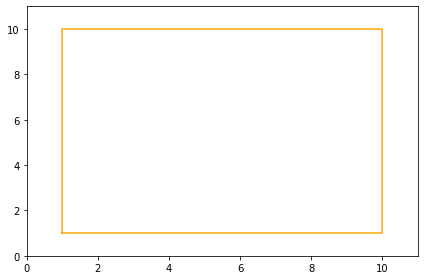

In [4]:
###########################
# berkson2
###########################

# Full scatter data
np.random.seed(1337)
df_2 = pd.DataFrame(data={'y':[1,10,10,1,1]}, index=[1,1,10,10,1])

# Plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
_ = df_2.plot(ax=ax, c="orange", legend=False)
ax.set_xlim(0,11)
ax.set_ylim(0,11)
fig.tight_layout()

In [5]:
# Write all files
data_above = data.loc[data['total_score']>=target_total, ['attractiveness','niceness']].copy()
data_above['color'] = "#916FBB"
data_above['r'] = 3
WriteScatter(
    data_above,
    path = 'projects/berkson/scatterAbove.json',    
    x_col = "attractiveness",
    y_col = "niceness",
    varname = "scatterAbove"
)

data_below = data.loc[data['total_score']<target_total, ['attractiveness','niceness']].copy()
data_below['color'] = "#916FBB"
data_below['r'] = 3
WriteScatter(
    data_below,
    path = 'projects/berkson/scatterBelow.json',    
    x_col = "attractiveness",
    y_col = "niceness",
    varname = "scatterBelow"
)

df.reset_index(inplace=True)
WriteDfToJsonVar(df.copy(),
                 'projects/berkson/triangle.json',
                 "comx",
                 "triangle")

regline_sub.reset_index(inplace=True)
WriteDfToJsonVar(regline_sub.copy(),
                 'projects/berkson/regline_sub.json',
                 "comx",
                 "regline_sub")

regline_full.reset_index(inplace=True)
WriteDfToJsonVar(regline_full.copy(),
                 'projects/berkson/regline_full.json',
                 "comx",
                 "regline_full")